# Tutorial on linear classification 

This tutorial will go through some aspects of linear (binary) classification as presented in the lecture and in particular
1. Using linear regression as classification
2. non-linear classification using polynomials (polynomial features)


In [1]:
# Import relevant 
%matplotlib widget 
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  # higher level plotting tools
import numpy as np
from sklearn.linear_model import LinearRegression,Perceptron #Linear regression model
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import xlabel
sns.set()

ModuleNotFoundError: No module named 'ipympl'

### Generate 2D data points
The following snippet generates random samples from the Normal distribution for  binary classification (pos/neg). The two distributions have different means but the same covariance matrix.

In [2]:
# Generate 2 clusters of 2D training data
covariance = 1*np.eye(2)
n_samples = 40
pos = np.random.multivariate_normal([-2,2], covariance, n_samples)
neg = np.random.multivariate_normal([3,1], covariance, n_samples)

# restructure data in an input matrix X 
X = np.zeros((n_samples*2 ,2))
X[0:n_samples]=pos
X[n_samples:]=neg

#  Label/output vector
Y = np.ones(2*n_samples); 
Y[n_samples:-1] = -1

### Learn a Linear Decision Boundary of 2D Data

The next step learns a the model parameters of a linear classifier (hyperplane) and prints the coefficients of the model

In [3]:
## Learn the model parameters
svc = LinearRegression(fit_intercept=True).fit(X, Y)
a = svc.coef_
print(svc.intercept_)
print(a)

0.16277793063226667
[-0.32133116  0.02448724]


### Display the decision boundary with the positive and negative training examples and the decision boundary

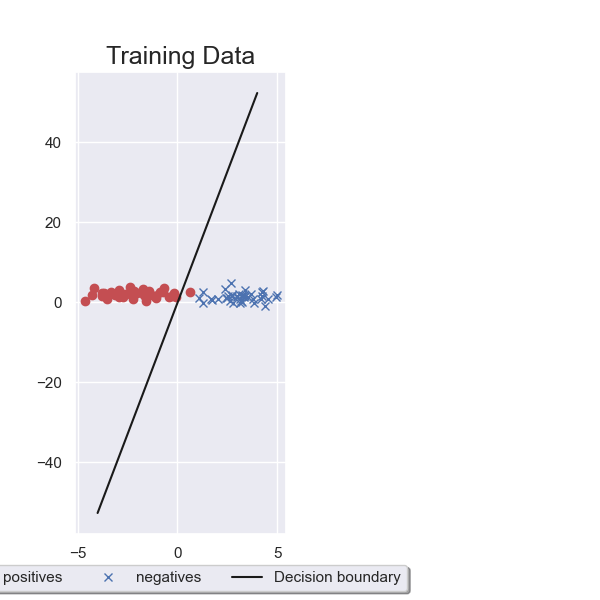

In [4]:

#lambda expression to generate hyperplane (decision boundary)
z = lambda x,y: (-svc.intercept_-svc.coef_[0]*x-svc.coef_[1]*y)
  
#lambda expression to generate decision boundary in feature space (decision boundary)
boundary = lambda x: -svc.intercept_+(-svc.coef_[0]*x)/svc.coef_[1]

x1,y1 = pos[:,0],pos[:,1]
x2,y2 = neg[:,0],neg[:,1]

# Plot data in feature space
fig = plt.figure(figsize=(6,6))
bx  = plt.subplot(1,2,1)
tmp = np.linspace(-4,4,100)
boundary(tmp)
plt.title("Training Data", fontsize=18)
plt.plot(x1,y1,'ro',label="positives")
plt.plot(x2,y2,'bx', label="negatives")
plt.plot(tmp,boundary(tmp),'k-',label = "Decision boundary")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)





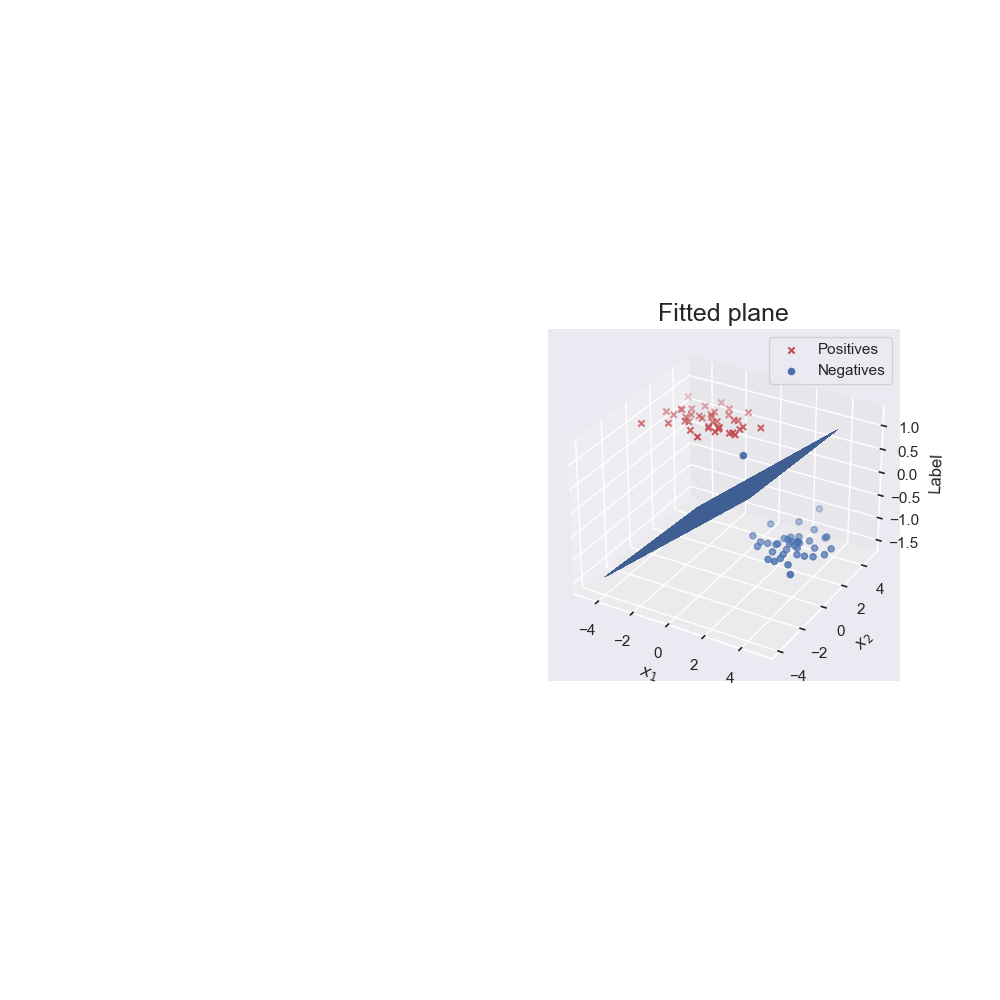

In [5]:

# 3D Plot data in feature space with labels
fig2 = plt.figure(figsize=(10,10))
ax  = plt.subplot(1,2,2, projection='3d')
ax.scatter(x1, y1, Y[0:n_samples],color = 'r', marker='x',label = "Positives")
ax.scatter(x2, y2, Y[n_samples:],color ='b', marker='o',label = "Negatives")
tmp = np.linspace(-4,4,100)
x,y = np.meshgrid(tmp,tmp)
ax.plot_surface(x, y, z(x,y),linewidth=0, antialiased=False,alpha=0.7)
plt.title("Fitted plane", fontsize=18)
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.set_zlabel("Label")
plt.legend();


### Making predictions

The following example uses the trained model to make predictions on the test data. Notice the distributions are different.

In [6]:
predict = lambda  x,y: (-svc.intercept_-svc.coef_[0]*x-svc.coef_[1]*y) 
# Make Test data
covarianceTest = 1*np.eye(2)
n_samplesTest = 50
posTest = np.random.multivariate_normal([-0.5,1], covarianceTest, n_samplesTest)
negTest = np.random.multivariate_normal([2,0], covarianceTest, n_samplesTest)

Number of True Positives 45 
Number of False Positives 5 
Number of True Negative 48 
Number of False Negative 2 


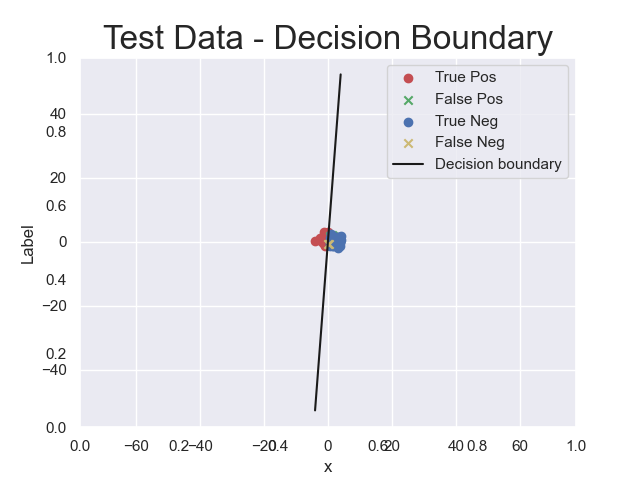

In [7]:

fig, ax = plt.subplots()
x1,y1 = posTest[:,0],posTest[:,1]
x2,y2 = negTest[:,0],negTest[:,1]

predPos = predict(x1,y1)
predNeg = predict(x2,y2)

truePos = predPos<=0.0
falsePos = predPos>0.0
trueNeg = predNeg>0.0
falseNeg = predNeg<=0.0

print("Number of True Positives %d " %  np.sum(truePos))
print("Number of False Positives %d " %  np.sum(falsePos))
print("Number of True Negative %d " %  np.sum(trueNeg))
print("Number of False Negative %d " %  np.sum(falseNeg))

ax  = fig.add_subplot(111)
ax.scatter(x1[truePos], y1[truePos],color = 'r', marker='o',label="True Pos")
ax.scatter(x1[falsePos], y1[falsePos],color = 'g',marker='x',label="False Pos")
ax.scatter(x2[trueNeg], y2[trueNeg],color = 'b',marker='o',label="True Neg")
ax.scatter(x2[falseNeg], y2[falseNeg],color = 'y', marker='x',label="False Neg")

tmp = np.linspace(-4,4,100)
plt.plot(tmp,boundary(tmp),'k-', label = "Decision boundary")
plt.title("Test Data - Decision Boundary", fontsize=24)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylabel("Label")
ax.axis('equal')
plt.legend();

## Non-linear decision boundary

The following example shows the use of non-linear decision boundaries of a 2D dataset


In [8]:

n_samples = 400
pos= np.random.multivariate_normal([0,0], [[.5,0],[0,.5]] , n_samples)
t = np.linspace(0,2*np.pi,n_samples)
x3, y3  = pos[:,0],pos[:,1]
neg = np.vstack([(3+x3)*np.sin(t), (3+y3)*np.cos(t)]).T

# restructure data in an input matrix X 
X = np.zeros((n_samples*2 ,2))
X[0:n_samples]=pos
X[n_samples:]=neg

#  Label/output vector
Y = np.ones(2*n_samples); 
Y[n_samples:-1] = -1

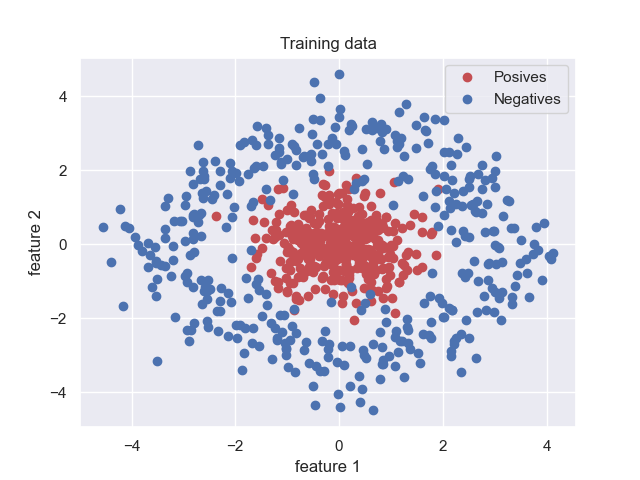

In [9]:
plt.figure()
plt.plot(pos[:,0],pos[:,1],'ro',label="Posives")
plt.plot(neg[:,0],neg[:,1],'bo',label="Negatives")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Training data")
plt.legend()

### Map features to polynomial features 
Map feature vector $\begin{bmatrix} x,y \end{bmatrix}$ to $\begin{bmatrix} 1,x,y,x^2,y^2 \end{bmatrix}$

In [10]:
poly = PolynomialFeatures(degree = 2, interaction_only=False)
X_poly = poly.fit_transform(X)


Visualize the polynomial features.

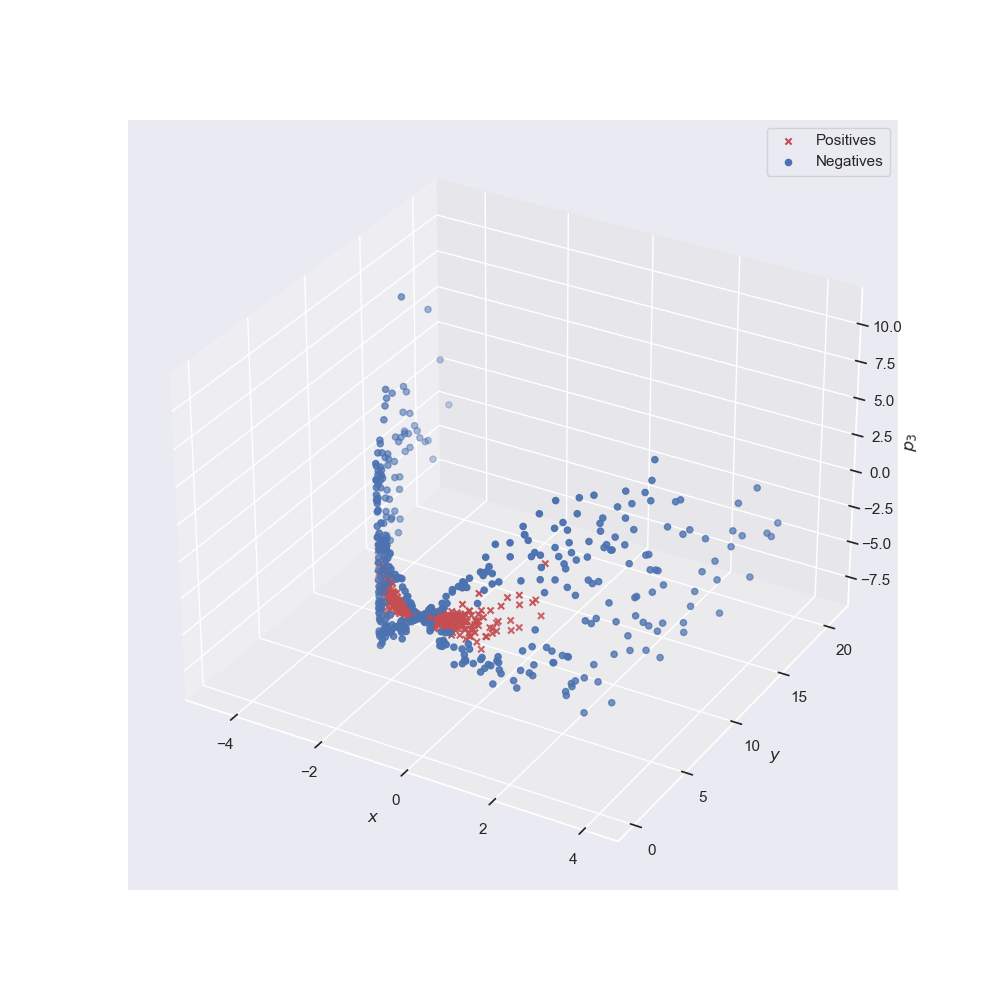

In [28]:
# Visualize polynomial features 
fig2 = plt.figure(figsize=(10,10))
ax  = plt.subplot(1,1,1, projection='3d')

posPoly = X_poly[0:n_samples,:]
negPoly = X_poly[n_samples:,:]

# Show the first 3 polynomial features
ax.scatter(posPoly[:,1], posPoly[:,2], posPoly[:,3],color = 'r', marker='x',label = "Positives")
ax.scatter(negPoly[:,1], negPoly[:,2], negPoly[:,3],color ='b', marker='o',label = "Negatives")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$p_3$")
plt.legend();

### Fit model to polynomial features

Number of True Positives 300 
Number of False Positives 100 
Number of True Negative 177 
Number of False Negative 223 


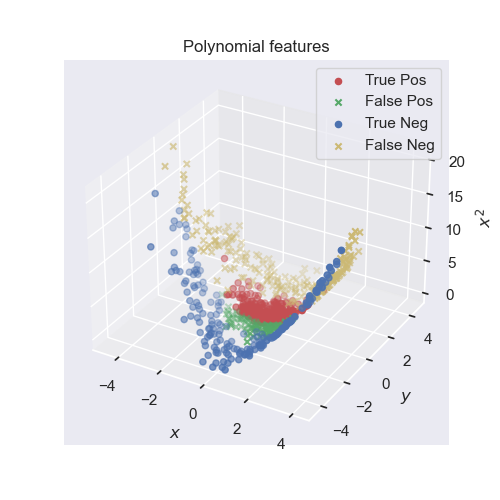

In [12]:
# Select the first 3 polynomial features and learn the linear separation
svc = LinearRegression().fit(X_poly[:,:3], Y)
#svc.score(X, Y)
#a = svc.coef_


#boundary = lambda x,y,z: (svc.intercept_-svc.coef_[0]*x)/svc.coef_[1]
predict = lambda x,y,z: (svc.coef_.dot(np.array([x,y,z]))+svc.intercept_)

fig3 = plt.figure(figsize=(5,5))
ax  = plt.subplot(1,1,1, projection='3d')

posPred = predict(posPoly[:,0], posPoly[:,1], posPoly[:,2])
negPred = predict(negPoly[:,0], negPoly[:,1], negPoly[:,2])


truePos = posPred>=0.0
falsePos = posPred<0.0
trueNeg = negPred<=0.0
falseNeg = negPred>0.0

print("Number of True Positives %d " %  np.sum(truePos))
print("Number of False Positives %d " %  np.sum(falsePos))
print("Number of True Negative %d " %  np.sum(trueNeg))
print("Number of False Negative %d " %  np.sum(falseNeg))

ax.scatter(posPoly[truePos,1], posPoly[truePos,2], posPoly[truePos,3],color = 'r', marker='o',label="True Pos")
ax.scatter(posPoly[falsePos,1], posPoly[falsePos,2], posPoly[falsePos,3],color = 'g',marker='x',label="False Pos")
ax.scatter(negPoly[trueNeg,1], negPoly[trueNeg,2], negPoly[trueNeg,3],color = 'b',marker='o',label="True Neg")
ax.scatter(negPoly[falseNeg,1], negPoly[falseNeg,2], negPoly[falseNeg,3],color = 'y', marker='x',label="False Neg")

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$x^2$")
plt.title("Polynomial features")
ax.legend()

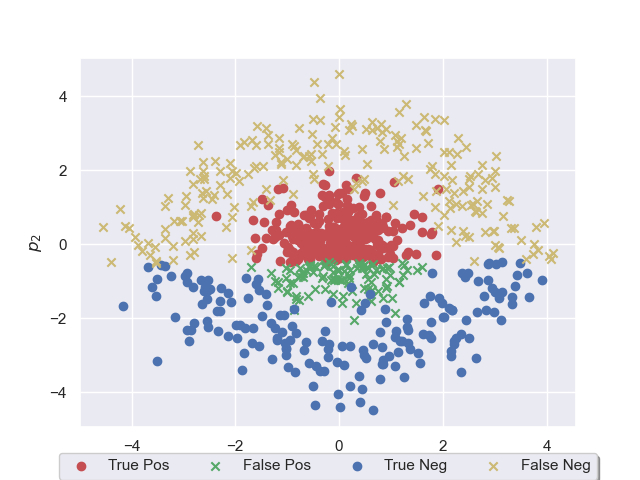

In [13]:
fig = plt.figure()
Xpos = pos
Xneg= neg
plt.scatter(Xpos[truePos,0], Xpos[truePos,1],color = 'r', marker='o',label="True Pos")
plt.scatter(Xpos[falsePos,0], Xpos[falsePos,1],color = 'g',marker='x',label="False Pos")
plt.scatter(Xneg[trueNeg,0], Xneg[trueNeg,1],color = 'b',marker='o',label="True Neg")
plt.scatter(Xneg[falseNeg,0], Xneg[falseNeg,1],color = 'y', marker='x',label="False Neg")
ax = fig.get_axes()[0]
ax.set_xlabel(r"$p_1$")
ax.set_ylabel(r"$p_2$")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);

## Logistic Regression

The next example shows aspects of logistic regression and how to set it up in PyTorch. 

In [14]:
def g(z) :  # define sigmoid function
    return 1/(1 + np.exp(-z))

Text(0.5, 1.0, 'Sigmoid Function g(z) = 1/(1 + exp(-z))')

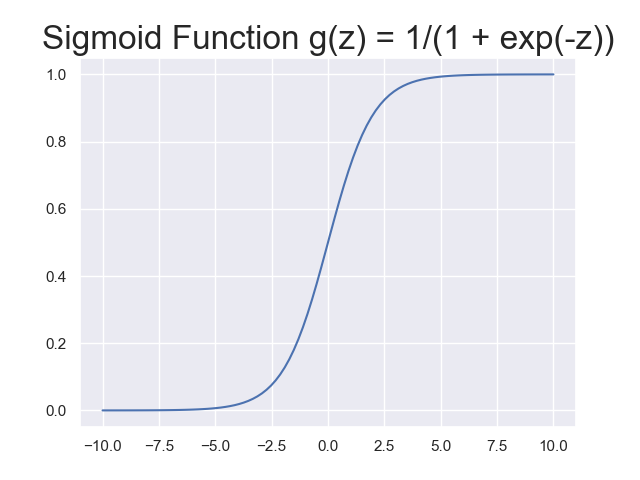

In [15]:
plt.figure()
z = np.linspace(-10,10,100)
plt.plot(z, g(z))
plt.title("Sigmoid Function g(z) = 1/(1 + exp(-z))", fontsize=24)

Text(3, 0.8, 'Concave')

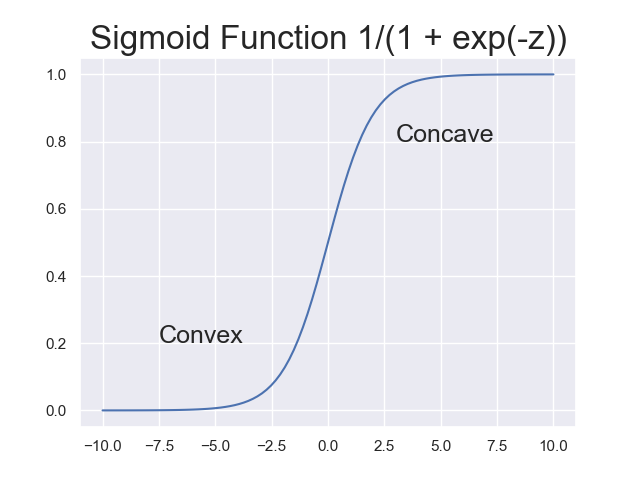

In [16]:
z = np.linspace(-10,10,100)
fig, ax = plt.subplots()
ax.plot(z, g(z)) 
ax.set_title('Sigmoid Function 1/(1 + exp(-z))', fontsize=24)
ax.annotate('Convex', (-7.5,0.2), fontsize=18 )
ax.annotate('Concave', (3,0.8), fontsize=18 )

In [17]:

#Plot the sigmoid function
z = np.linspace(-10,10,100)
plt.plot(z, -np.log(g(z)))
plt.title("Log Sigmoid Function -log(1/(1 + exp(-z)))", fontsize=24)
plt.annotate('Convex', (-2.5,3), fontsize=18 )

Text(-2.5, 3, 'Convex')

# Pytorch



The following example shows how logistic regression can be made in Pytorch. 

In [18]:
## Load dataset

In [19]:
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets


## load the dataset and split into training and testset

In [20]:
batch_size = 100
n_iters = 3000
input_dim = 784
output_dim = 10
lr_rate = 0.001
download = False # Change this to True if you do not have the dataset

 Splut the dataset into a training and testset. 

In [21]:
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=download)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
epochs = n_iters / (len(train_dataset) / batch_size)


In [22]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

## Define a class for logistic regression

The constructor defines the input and output matrix 
The 'forward()' method makes a prediction given input 'x' 

In [23]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

In [24]:
model = LogisticRegression(input_dim, output_dim)

### Getting ready to learn the model parameters

The next steps are needed to learn the model parameters. This part will be explained in the next lectures. You should not expect to understand these steps YET!


In [25]:
criterion = torch.nn.CrossEntropyLoss() # computes softmax and then the cross entropy


In [26]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

##Train model

In [27]:
iter = 0
print(epochs)
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter+=1
        if iter%500==0:
            # calculate Accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28*28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total+= labels.size(0)
                # for gpu, bring the predicted and labels back to cpu fro python operations to work
                correct+= (predicted == labels).sum()
            accuracy = 100 * correct/total
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter, loss.item(), accuracy))

5.0
Iteration: 500. Loss: 1.8557389974594116. Accuracy: 67.73999786376953.
Iteration: 1000. Loss: 1.5530949831008911. Accuracy: 76.69999694824219.
Iteration: 1500. Loss: 1.318636417388916. Accuracy: 79.4000015258789.
Iteration: 2000. Loss: 1.223029375076294. Accuracy: 81.0999984741211.
Iteration: 2500. Loss: 1.0455706119537354. Accuracy: 82.01000213623047.
Iteration: 3000. Loss: 1.0006531476974487. Accuracy: 82.91000366210938.
